PROYEK AKHIR MACHINE LEARNING INTERMEDIATE
-----
Nama  : Agi Fransdana

Username : agi_fransdana_HCmZ

Email : agif270602@gmail.com

In [ ]:
# TensorFlow dan Keras untuk membuat dan melatih model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Library visualisasi dan analisis data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Scikit-learn untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow Lite
import tensorflow.lite as tflite
import requests
import json

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
!kaggle datasets download -d harshvardhan21/sign-language-detection-using-images

Dataset URL: https://www.kaggle.com/datasets/harshvardhan21/sign-language-detection-using-images
License(s): apache-2.0
 99% 266M/268M [00:04<00:00, 55.3MB/s]
100% 268M/268M [00:04<00:00, 59.0MB/s]


In [ ]:
!unzip sign-language-detection-using-images.zip -d sign-language-detection-using-images

Streaming output truncated to the last 5000 lines.
  inflating: sign-language-detection-using-images/data/V/819.jpg  
  inflating: sign-language-detection-using-images/data/V/82.jpg  
  inflating: sign-language-detection-using-images/data/V/820.jpg  
  inflating: sign-language-detection-using-images/data/V/821.jpg  
  inflating: sign-language-detection-using-images/data/V/822.jpg  
  inflating: sign-language-detection-using-images/data/V/823.jpg  
  inflating: sign-language-detection-using-images/data/V/824.jpg  
  inflating: sign-language-detection-using-images/data/V/825.jpg  
  inflating: sign-language-detection-using-images/data/V/826.jpg  
  inflating: sign-language-detection-using-images/data/V/827.jpg  
  inflating: sign-language-detection-using-images/data/V/828.jpg  
  inflating: sign-language-detection-using-images/data/V/829.jpg  
  inflating: sign-language-detection-using-images/data/V/83.jpg  
  inflating: sign-language-detection-using-images/data/V/830.jpg  
  inflating: 

In [ ]:
base_dir = "sign-language-detection-using-images/data"

In [ ]:
def count_images_in_directory(directory):
    image_extensions = ('.png', '.jpg', '.jpeg')
    total_images = 0
    label_counts = {}

    for root, _, files in os.walk(directory):
        count = len([file for file in files if file.lower().endswith(image_extensions)])

        if count > 0:
            label = os.path.basename(root)
            label_counts[label] = count
            total_images += count

    return total_images, label_counts

base_dir = "sign-language-detection-using-images/data"

total_images, label_counts = count_images_in_directory(base_dir)
print(f"Total gambar dalam dataset: {total_images}")
print("\nJumlah gambar per kelas/label:")
for label, count in label_counts.items():
    print(f"{label}: {count} gambar")

Total gambar dalam dataset: 42000

Jumlah gambar per kelas/label:
U: 1200 gambar
M: 1200 gambar
9: 1200 gambar
V: 1200 gambar
O: 1200 gambar
4: 1200 gambar
Z: 1200 gambar
5: 1200 gambar
I: 1200 gambar
8: 1200 gambar
L: 1200 gambar
H: 1200 gambar
G: 1200 gambar
3: 1200 gambar
T: 1200 gambar
B: 1200 gambar
W: 1200 gambar
X: 1200 gambar
1: 1200 gambar
S: 1200 gambar
6: 1200 gambar
Q: 1200 gambar
D: 1200 gambar
A: 1200 gambar
J: 1200 gambar
C: 1200 gambar
2: 1200 gambar
F: 1200 gambar
7: 1200 gambar
N: 1200 gambar
R: 1200 gambar
E: 1200 gambar
K: 1200 gambar
P: 1200 gambar
Y: 1200 gambar


In [ ]:
import random
from PIL import Image

def generate_random_sizes(min_size, max_size, num_sizes):
    sizes = []
    for _ in range(num_sizes):
        width = random.randint(min_size, max_size)
        height = random.randint(min_size, max_size)
        sizes.append((width, height))
    return sizes

def resize_images_in_directory(directory, min_size, max_size):
    image_extensions = ('.png', '.jpg', '.jpeg')

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(image_extensions):
                img_path = os.path.join(root, file)

                try:
                    img = Image.open(img_path)
                    width = random.randint(min_size, max_size)
                    height = random.randint(min_size, max_size)
                    img_resized = img.resize((width, height), Image.ANTIALIAS)
                    img_resized.save(img_path)
                    print(f"Gambar {file} diresize menjadi {width}x{height}")

                except Exception as e:
                    print(f"Error resizing image {file}: {e}")
min_size = 120
max_size = 255
base_dir = "sign-language-detection-using-images/data"
resize_images_in_directory(base_dir, min_size, max_size)

<ipython-input-7-18a3482418d9>:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((width, height), Image.ANTIALIAS)


Streaming output truncated to the last 5000 lines.
Gambar 757.jpg diresize menjadi 148x211
Gambar 1023.jpg diresize menjadi 177x218
Gambar 166.jpg diresize menjadi 152x144
Gambar 1106.jpg diresize menjadi 172x236
Gambar 1132.jpg diresize menjadi 213x249
Gambar 960.jpg diresize menjadi 222x120
Gambar 76.jpg diresize menjadi 248x143
Gambar 788.jpg diresize menjadi 152x235
Gambar 1009.jpg diresize menjadi 174x123
Gambar 294.jpg diresize menjadi 127x223
Gambar 440.jpg diresize menjadi 139x212
Gambar 900.jpg diresize menjadi 233x144
Gambar 229.jpg diresize menjadi 209x193
Gambar 209.jpg diresize menjadi 150x235
Gambar 174.jpg diresize menjadi 134x122
Gambar 327.jpg diresize menjadi 150x242
Gambar 344.jpg diresize menjadi 248x213
Gambar 114.jpg diresize menjadi 165x144
Gambar 1054.jpg diresize menjadi 144x221
Gambar 646.jpg diresize menjadi 195x233
Gambar 273.jpg diresize menjadi 233x196
Gambar 254.jpg diresize menjadi 136x188
Gambar 855.jpg diresize menjadi 199x138
Gambar 503.jpg diresize m

In [ ]:
def count_images_in_directory(directory):
    image_extensions = ('.png', '.jpg', '.jpeg')
    total_images = 0
    label_counts = {}

    print(f"Memeriksa direktori: {directory}")

    for root, dirs, files in os.walk(directory):
        print(f"Memeriksa folder: {root}")
        count = len([file for file in files if file.lower().endswith(image_extensions)])

        if count > 0:
            label = os.path.basename(root)
            label_counts[label] = count
            total_images += count

    return total_images, label_counts

base_dir = "sign-language-detection-using-images/data"

total_images, label_counts = count_images_in_directory(base_dir)

print(f"Total gambar dalam dataset: {total_images}")
print("\nJumlah gambar per kelas/label:")
for label, count in label_counts.items():
    print(f"{label}: {count} gambar")

Memeriksa direktori: sign-language-detection-using-images/data
Memeriksa folder: sign-language-detection-using-images/data
Memeriksa folder: sign-language-detection-using-images/data/U
Memeriksa folder: sign-language-detection-using-images/data/M
Memeriksa folder: sign-language-detection-using-images/data/9
Memeriksa folder: sign-language-detection-using-images/data/V
Memeriksa folder: sign-language-detection-using-images/data/O
Memeriksa folder: sign-language-detection-using-images/data/4
Memeriksa folder: sign-language-detection-using-images/data/Z
Memeriksa folder: sign-language-detection-using-images/data/5
Memeriksa folder: sign-language-detection-using-images/data/I
Memeriksa folder: sign-language-detection-using-images/data/8
Memeriksa folder: sign-language-detection-using-images/data/L
Memeriksa folder: sign-language-detection-using-images/data/H
Memeriksa folder: sign-language-detection-using-images/data/G
Memeriksa folder: sign-language-detection-using-images/data/3
Memeriksa

In [ ]:
root_dir = Path('sign-language-detection-using-images/data')

image_paths = list(root_dir.rglob('*.jpg')) + list(root_dir.rglob('*.JPG')) + \
              list(root_dir.rglob('*.png')) + list(root_dir.rglob('*.PNG'))

labels = [Path(filepath).parent.name for filepath in image_paths]

df_images = pd.DataFrame({
    'Filepath': image_paths,
    'Label': labels
})

df_images.head()

,Filepath,Label
0,sign-language-detection-using-images/data/U/93...,U
1,sign-language-detection-using-images/data/U/10...,U
2,sign-language-detection-using-images/data/U/61...,U
3,sign-language-detection-using-images/data/U/70...,U
4,sign-language-detection-using-images/data/U/75...,U


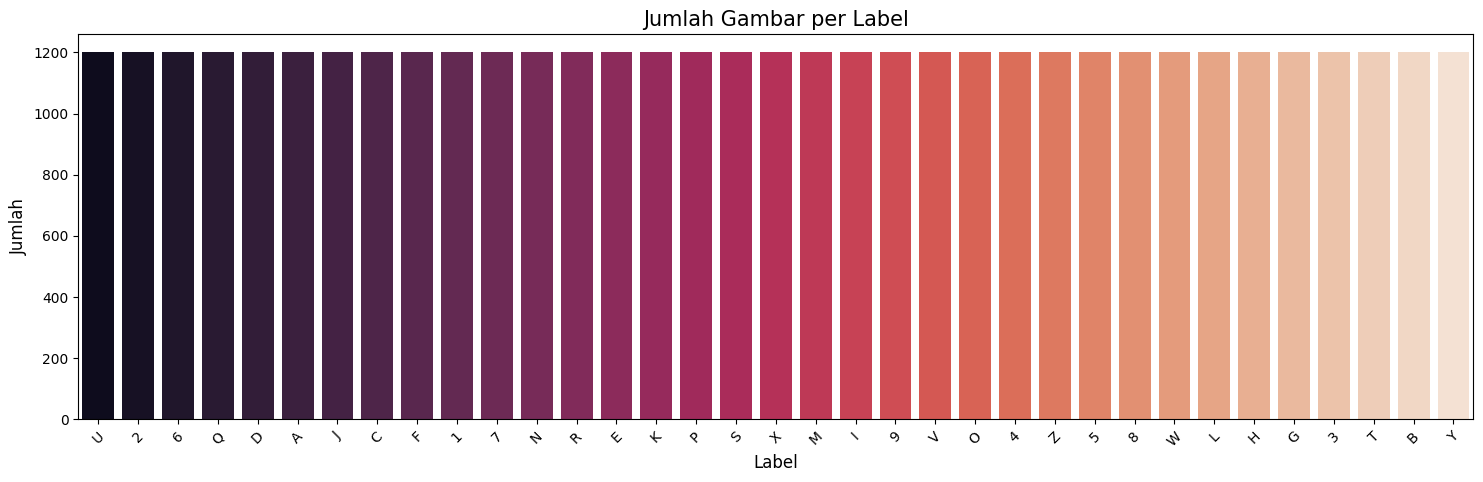

In [ ]:
# Visualisasikan distribusi label dengan barplot
plt.figure(figsize=(18, 5))

sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='rocket', hue=label_distribution.index, dodge=False, legend=False)

plt.title('Jumlah Gambar per Label', fontsize=15)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.show()

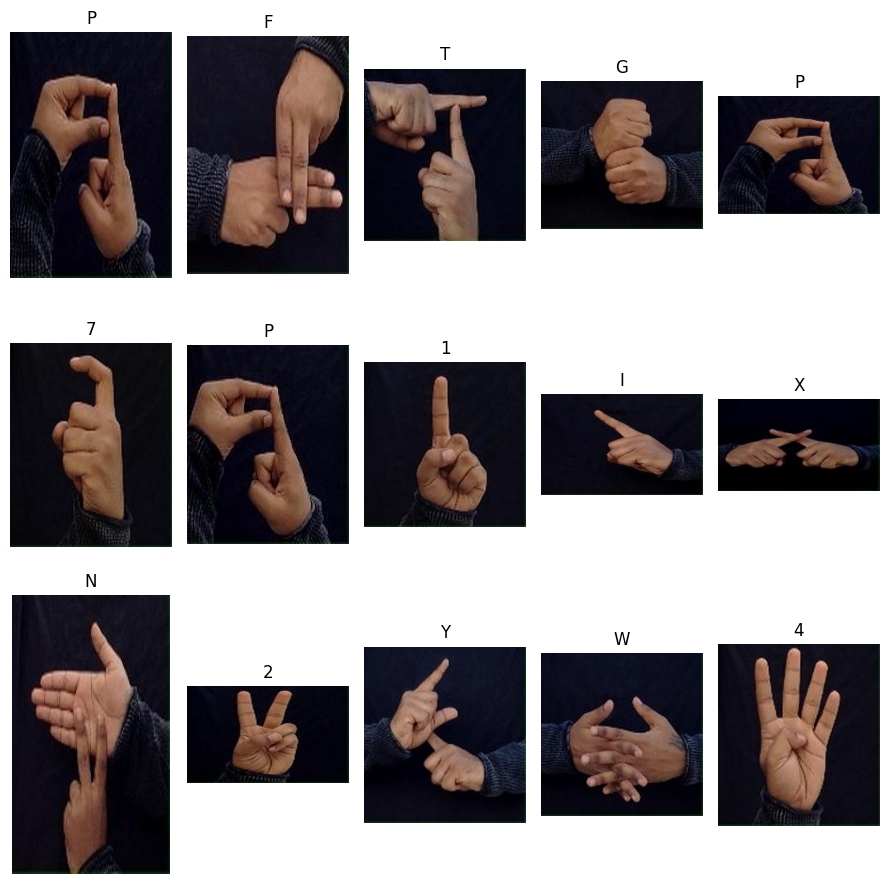

In [ ]:
sample_images = df_images.sample(n=15)

fig, axes = plt.subplots(3, 5, figsize=(9, 9))
for ax, (i, row) in zip(axes.flatten(), sample_images.iterrows()):
    img = Image.open(row['Filepath'])
    ax.imshow(img)
    ax.set_title(row['Label'])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk mengubah gambar menjadi array
def load_image_as_array(filepath, target_size=(64, 64)):
    img = Image.open(filepath)
    img = img.resize(target_size)
    return np.array(img)

In [ ]:
# Konversi semua gambar menjadi array
X_data = np.array([load_image_as_array(filepath) for filepath in df_images['Filepath']])
y_data = np.array(df_images['Label'])

# Cek bentuk (shape) dari data
print(f'Bentuk X: {X_data.shape}')
print(f'Bentuk y: {y_data.shape}')

# Normalisasi data gambar
X_data = X_data.astype('float32') / 255.0

Bentuk X: (42000, 64, 64, 3)
Bentuk y: (42000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_data_encoded = encoder.fit_transform(y_data)
y_data_one_hot = to_categorical(y_data_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_one_hot, test_size=0.2, random_state=42)

print(f'Bentuk X_train: {X_train.shape}')
print(f'Bentuk X_test: {X_test.shape}')
print(f'Bentuk y_train: {y_train.shape}')
print(f'Bentuk y_test: {y_test.shape}')

Bentuk X_train: (33600, 64, 64, 3)
Bentuk X_test: (8400, 64, 64, 3)
Bentuk y_train: (33600, 35)
Bentuk y_test: (8400, 35)


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           2,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,643 (41.57 KB)

 Trainable params: 10,531 (41.14 KB)

 Non-trainable params: 112 (448.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 108s 99ms/step - accuracy: 0.1374 - loss: 3.2473 - val_accuracy: 0.7363 - val_loss: 1.9006 - learning_rate: 1.0000e-04
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 143s 101ms/step - accuracy: 0.5326 - loss: 1.8166 - val_accuracy: 0.9945 - val_loss: 0.6900 - learning_rate: 1.0000e-04
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 143s 102ms/step - accuracy: 0.7746 - loss: 0.9722 - val_accuracy: 0.9967 - val_loss: 0.2185 - learning_rate: 1.0000e-04
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 0.8841 - loss: 0.5482 - val_accuracy: 1.0000 - val_loss: 0.0685 - learning_rate: 1.0000e-04
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 143s 101ms/step - accuracy: 0.9331 - loss: 0.3379 - val_accuracy: 1.0000 - val_loss: 0.0304 - learning_rate: 1.0000e-04
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 104s 99ms/step - accuracy: 0.9546 - loss: 0.2301 - val_accuracy: 1.0000 - val_loss: 0.0152 - learning_rate: 1.0000e-04
Epoch 7/15
1050/1050 ━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 1.0000 - loss: 1.2990e-04
Test Loss: 0.00012917682761326432
Test Accuracy: 1.0


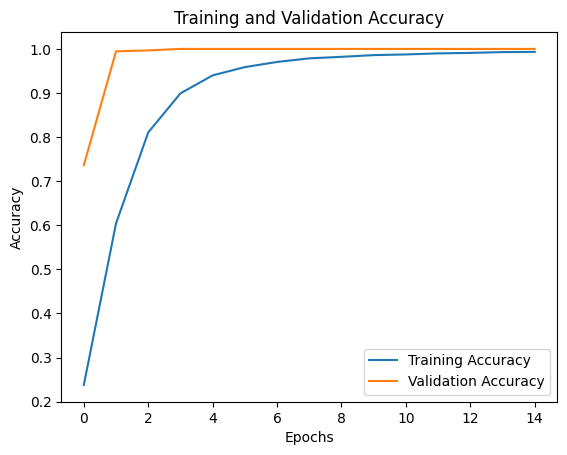

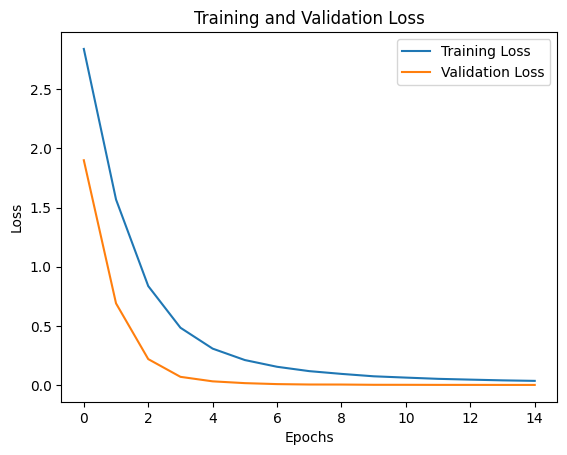

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step


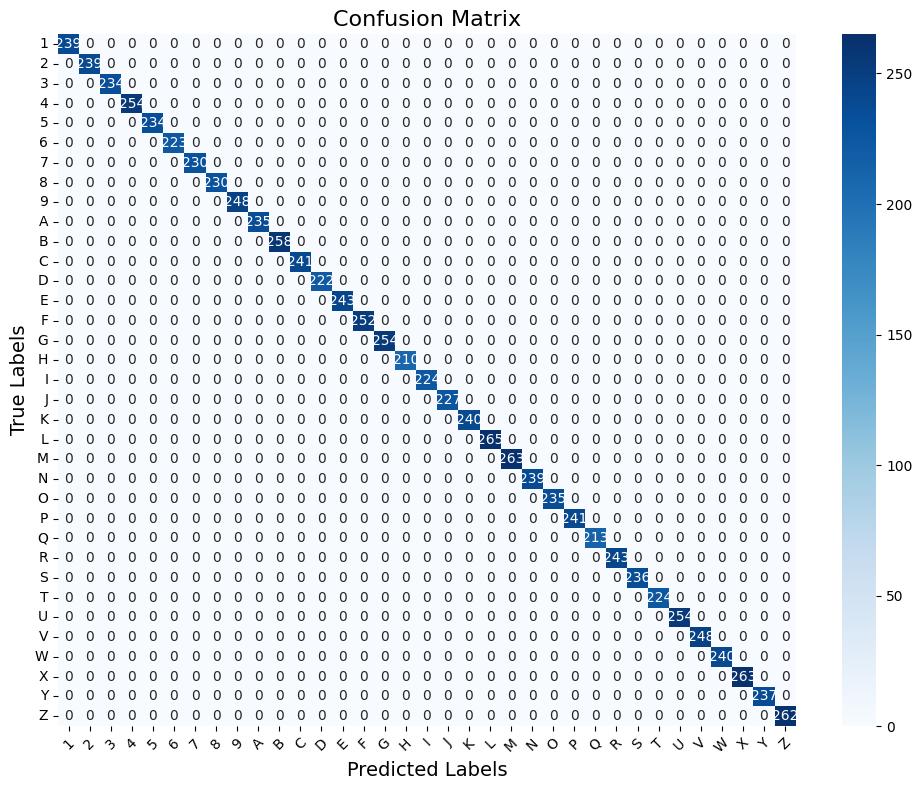

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       234
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       234
           6       1.00      1.00      1.00       223
           7       1.00      1.00      1.00       230
           8       1.00      1.00      1.00       230
           9       1.00      1.00      1.00       248
           A       1.00      1.00      1.00       235
           B       1.00      1.00      1.00       258
           C       1.00      1.00      1.00       241
           D       1.00      1.00      1.00       222
           E       1.00      1.00      1.00       243
           F       1.00      1.00      1.00       252
           G       1.00      1.00      1.00       254
           H       1.00      1.00      1.00       210
    

In [ ]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
          'U', 'V', 'W', 'X', 'Y', 'Z']

y_test_labels = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

class_report = classification_report(y_test_labels, y_pred_labels, target_names=labels)
print("Classification Report:")
print(class_report)

In [ ]:
# Buat struktur folder
submission_dir = 'submission'
tfjs_model_dir = os.path.join(submission_dir, 'tfjs_model')
tflite_model_dir = os.path.join(submission_dir, 'tflite')
saved_model_dir = os.path.join(submission_dir, 'saved_model')

os.makedirs(tfjs_model_dir, exist_ok=True)
os.makedirs(tflite_model_dir, exist_ok=True)
os.makedirs(saved_model_dir, exist_ok=True)

In [ ]:
import tensorflow as tf

saved_model_dir = 'submission/saved_model'
model.export(saved_model_dir)

Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  140341232332016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341232335888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231903040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231905152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231898464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231900752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199636608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199639424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199640304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199642944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1403411996

In [ ]:
tflite_model_dir = 'submission/tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(os.path.join(tflite_model_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpqhwe8jv6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  140341232332016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341232335888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231903040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231905152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231898464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231900752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199636608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199639424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199640304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199642944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199641360:

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(os.path.join(tflite_model_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpm0ukaned'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  140341232332016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341232335888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231903040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231905152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231898464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341231900752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199636608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199639424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199640304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199642944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140341199641360:

In [ ]:
import subprocess

tfjs_model_dir = 'submission/tfjs_model'
os.makedirs(tfjs_model_dir, exist_ok=True)
subprocess.run(['tensorflowjs_converter', '--input_format=tf_saved_model',
                '--output_format=tfjs_graph_model', saved_model_dir, tfjs_model_dir])

CompletedProcess(args=['tensorflowjs_converter', '--input_format=tf_saved_model', '--output_format=tfjs_graph_model', 'submission/saved_model', 'submission/tfjs_model'], returncode=0)

In [ ]:
label_file_path = os.path.join(tflite_model_dir, 'label.txt')

class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
                'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                'U', 'V', 'W', 'X', 'Y', 'Z']

with open(label_file_path, 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
!zip -r submission.zip submission

  adding: submission/ (stored 0%)
  adding: submission/tfjs_model/ (stored 0%)
  adding: submission/tfjs_model/model.json (deflated 89%)
  adding: submission/tfjs_model/group1-shard1of1.bin (deflated 7%)
  adding: submission/saved_model/ (stored 0%)
  adding: submission/saved_model/variables/ (stored 0%)
  adding: submission/saved_model/variables/variables.index (deflated 69%)
  adding: submission/saved_model/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: submission/saved_model/assets/ (stored 0%)
  adding: submission/saved_model/fingerprint.pb (stored 0%)
  adding: submission/saved_model/saved_model.pb (deflated 87%)
  adding: submission/tflite/ (stored 0%)
  adding: submission/tflite/label.txt (deflated 20%)
  adding: submission/tflite/model.tflite (deflated 13%)


In [ ]:
import shutil
zip_file_path = '/content/submission.zip'
destination_path = '/content/submission_saved.zip'
shutil.copy(zip_file_path, destination_path)
print(f"File ZIP telah disimpan di {destination_path}")

File ZIP telah disimpan di /content/submission_saved.zip


In [ ]:
import tflite_runtime.interpreter as tflite
from PIL import Image

model_path = 'submission/tflite/model.tflite'
interpreter = tflite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

img_path = 'depositphotos_7426187-stock-photo-hand-sign-language-alphabet.jpg'
img = Image.open(img_path).resize((input_details[0]['shape'][1], input_details[0]['shape'][2]))
img_array = np.array(img, dtype=np.float32)
img_array = np.expand_dims(img_array, axis=0) / 255.0

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Output:", output_data)

Output: [[1.1429715e-29 3.4708997e-37 7.4030844e-25 6.9831451e-29 4.7365650e-21
  6.9911493e-34 3.7224562e-28 6.2215748e-32 3.9094731e-28 5.9779569e-18
  1.4817935e-27 2.6523396e-13 7.9106460e-14 8.7707649e-21 4.6240019e-36
  4.0638283e-36 4.4430347e-25 2.3989942e-12 0.0000000e+00 2.5204969e-22
  6.8067359e-32 1.9526124e-03 1.5186532e-19 1.9760089e-13 3.5848956e-27
  1.0271646e-19 5.2001906e-15 1.1876371e-21 2.7472268e-07 1.4229713e-15
  2.7240214e-27 7.1906129e-23 1.2212053e-31 9.9804711e-01 5.6076994e-11]]


In [ ]:
!pip freeze > requirements.txt